In [3]:
# User defined functions
from mlp import visualisation as viz
from mlp import model_functions as modf

# Standard Libraries
from scipy import stats
import pandas as pd
import numpy as np
import pickle
import time

# Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # higher resolution plots

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Machine Learning #
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Misc
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

# Random State #
np.random.seed(8888)

#### Loading and Splitting Our Dataset

In [2]:
with open('./data/training_dataset.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,temperature,relative_humidity,windspeed,psi,guest_users,registered_users,total_users,log_total_users,year,temp_diff,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weather_cloudy,weather_light snow/rain,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_spring,season_summer,season_winter,l1_log_total_users,l2_log_total_users,l3_log_total_users,l4_log_total_users,l5_log_total_users,l6_log_total_users,l7_log_total_users,l8_log_total_users,l9_log_total_users,l10_log_total_users,l11_log_total_users,l12_log_total_users
0,81.9,77.0,19.0,33,204,711,915,6.818924,2011,29.3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6.352629,5.986452,4.867534,4.644391,3.465736,2.833213,2.484907,2.079442,4.997212,5.968708,6.154858,5.220356
1,85.3,72.0,20.0,2,328,608,936,6.841615,2011,29.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6.818924,6.352629,5.986452,4.867534,4.644391,3.465736,2.833213,2.484907,2.079442,4.997212,5.968708,6.154858
2,85.3,72.0,19.0,12,247,928,1175,7.069023,2011,29.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6.841615,6.818924,6.352629,5.986452,4.867534,4.644391,3.465736,2.833213,2.484907,2.079442,4.997212,5.968708
3,83.6,77.0,20.0,41,279,908,1187,7.079184,2011,29.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7.069023,6.841615,6.818924,6.352629,5.986452,4.867534,4.644391,3.465736,2.833213,2.484907,2.079442,4.997212
4,81.9,82.0,20.0,19,289,680,969,6.876265,2011,29.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7.079184,7.069023,6.841615,6.818924,6.352629,5.986452,4.867534,4.644391,3.465736,2.833213,2.484907,2.079442


We will be using the log transformed version of our total users as the target variable.

In [4]:
X = df.drop(['total_users', 'log_total_users', 'guest_users', 'registered_users'], axis=1)
y = df.log_total_users

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X ,y, test_size=0.2)

### Base Model : Linear Regression

In [6]:
linreg_rmse, linreg_score, linreg_adj_score = modf.kfold_cv_glm(X_train, y_train, 0, model_type='linear')

In [7]:
modf.model_results_summary(linreg_rmse, linreg_score, linreg_adj_score, model_type='Linear Regression')

              Linear Regression Results Summary
		 Mean RMSE 	 Mean R^2 	 Mean Adj R^2
Training 	 0.4597 	 0.9039 	 0.9038
Validation 	 0.4627 	 0.9025 	 0.9025


In [8]:
# Dataframe to save model results
model_results = pd.DataFrame(columns=['Model', 'RMSE', 'R-Squared'])

In [9]:
# Saving Linear Regression Results
model_results = modf.append_results(model_results, 'Linear', linreg_rmse, linreg_score)
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521


### Lasso Regression

#### Investigating how RMSE changes as Alpha changes

In [10]:
alpha_vector = [0.0001, 0.001, 0.01, 0.1, 1, 10]

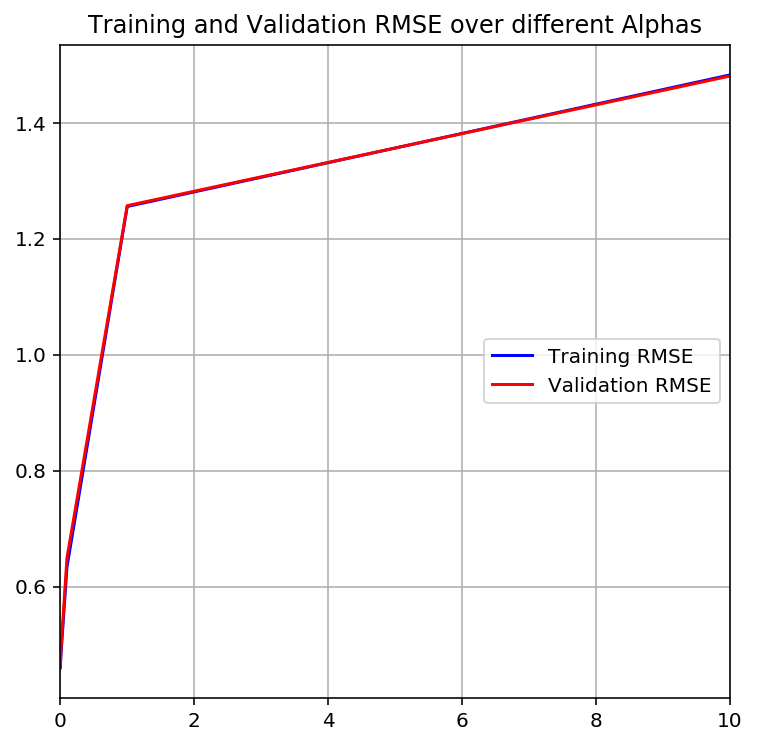

In [11]:
modf.alpha_plots(alpha_vector, X_train, y_train, X_valid, y_valid, model_type='lasso')

It appears that our optimal alpha is very small. We will plot the graph again with smaller range of alpha values.

In [12]:
alpha_vector = np.linspace(0.001, 0.01, 10)

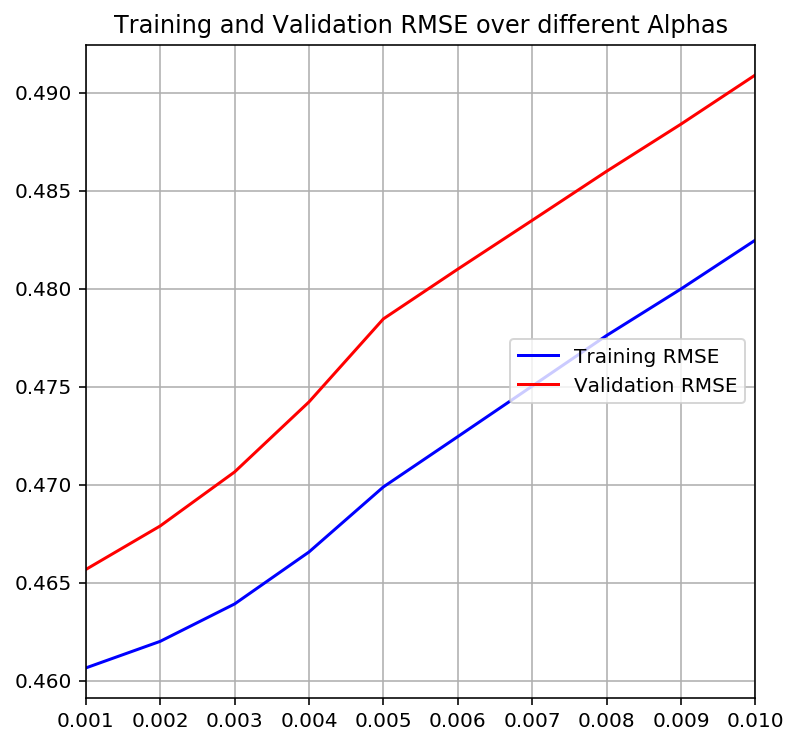

In [13]:
modf.alpha_plots(alpha_vector, X_train, y_train, X_valid, y_valid, model_type='lasso')

It seems that the RMSE continues to increase with the alpha coefficient. We will utilise a cross validated GridSearch to determine the optimal alpha coefficient for our Lasso Regression.

#### Grid Search Cross Validation for Optimal Alpha

In [14]:
# Lasso Model Pipeline
lasso_pipe = Pipeline(steps=[('Standardise', StandardScaler()),
                             ('Lasso', Lasso()
                             )])

# Parameters to tune
parameters_lasso = {'Lasso__alpha' : alpha_vector,
                    'Lasso__fit_intercept' : [True, False]}

In [15]:
# Defining and fitting the Grid Search estimator
gscv_lasso = GridSearchCV(lasso_pipe, parameters_lasso, n_jobs=-1,
                          scoring='neg_mean_squared_error', verbose=False, cv=5)

gscv_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Standardise',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
  

In [16]:
gscv_lasso.best_params_

{'Lasso__alpha': 0.001, 'Lasso__fit_intercept': True}

In [17]:
# Saving the optimal alpha for lasso model
alpha_lasso = gscv_lasso.best_params_['Lasso__alpha']

#### Lasso Model Results Using Optimal Alpha

In [18]:
lasso_rmse, lasso_score, lasso_adj_score = modf.kfold_cv_glm(X_train, y_train, optimal_alpha=alpha_lasso, model_type='lasso')

In [19]:
modf.model_results_summary(lasso_rmse, lasso_score, lasso_adj_score, model_type='Lasso Regression')

              Lasso Regression Results Summary
		 Mean RMSE 	 Mean R^2 	 Mean Adj R^2
Training 	 0.4602 	 0.9036 	 0.9036
Validation 	 0.4634 	 0.9022 	 0.9022


In [20]:
# Saving Lasso Regression Results
model_results = modf.append_results(model_results, 'Lasso', lasso_rmse, lasso_score)
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521
1,Lasso,0.463449,0.902248


### Ridge Regression Model

#### Investigating how RMSE changes as Alpha changes

In [21]:
alpha_vector = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

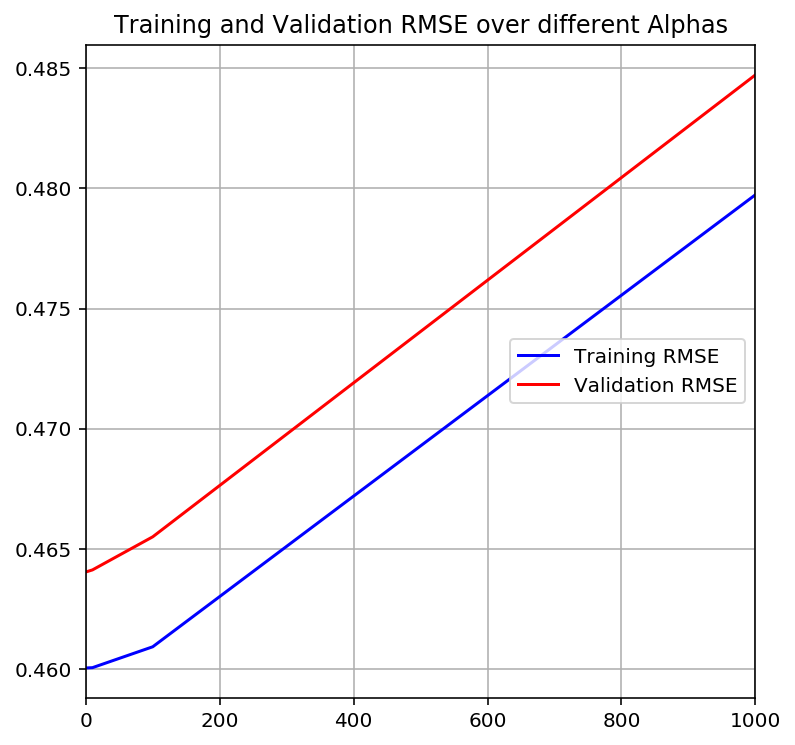

In [22]:
modf.alpha_plots(alpha_vector, X_train, y_train, X_valid, y_valid, model_type='ridge')

From the diagram above, we can see that the optimal alpha coefficient for the Ridge model is approximately less than 100. We will plot the RMSE values over a new range of alpha values.

In [23]:
alpha_vector = np.arange(1,101,step=1)

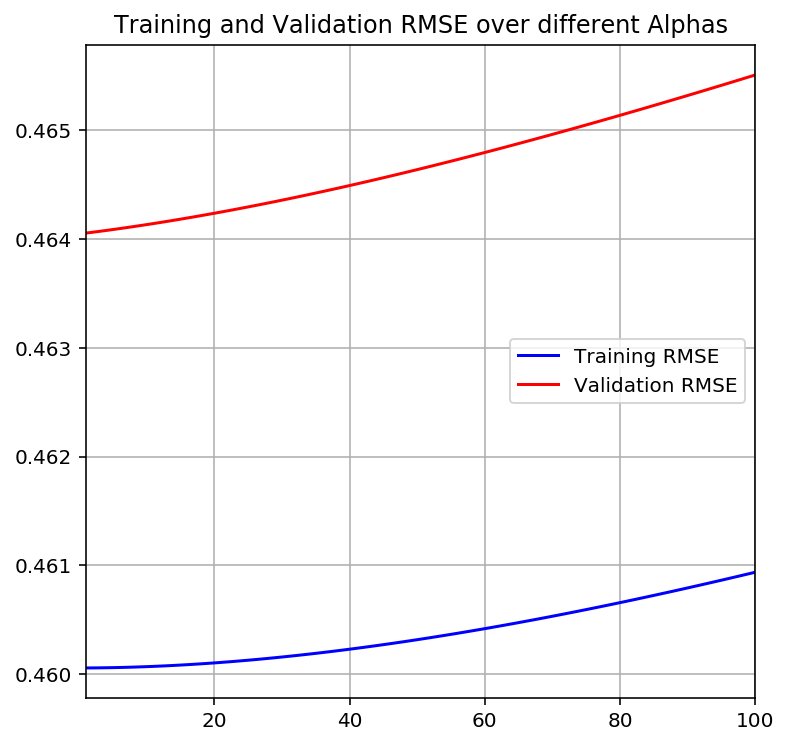

In [24]:
ridge_rmse_train, ridge_rmse_valid = modf.alpha_plots(alpha_vector, X_train, y_train, X_valid, y_valid,
                                                      model_type='ridge', return_series=True)

Our optimal alpha is likely to be less than 50, so we will perform a grid search to determine the optimal value.

#### Grid Search Cross Validation for Optimal Alpha

Our optimal alpha should lie somewhere between 75 - 150. We will use a grid search to determine our optimal alpha value.

In [25]:
alpha_vector = np.arange(1, 51, step=1)

In [26]:
# Ridge pipeline for Grid Search
ridge_pipe = Pipeline(steps=[('Standardise', StandardScaler()),
                             ('Ridge', Ridge())
                            ])

# Ridge paramters to tune 
parameters_ridge = {'Ridge__alpha' : alpha_vector,
                    'Ridge__fit_intercept' : [True, False]}

In [27]:
# Defining and fitting the Grid Search estimator
gscv_ridge = GridSearchCV(ridge_pipe, parameters_ridge, n_jobs=-1,
                          scoring='neg_mean_squared_error', verbose=False, cv=5)

gscv_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Standardise',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'Ridge__alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 2

In [28]:
gscv_ridge.best_params_

{'Ridge__alpha': 11, 'Ridge__fit_intercept': True}

In [29]:
ridge_alpha = gscv_ridge.best_params_['Ridge__alpha']

#### Ridge Model Using Optimal Alpha

In [30]:
ridge_rmse, ridge_score, ridge_adj_score = modf.kfold_cv_glm(X_train, y_train, ridge_alpha, model_type='ridge')

In [31]:
modf.model_results_summary(ridge_rmse, ridge_score, ridge_adj_score, model_type='Ridge Regression')

              Ridge Regression Results Summary
		 Mean RMSE 	 Mean R^2 	 Mean Adj R^2
Training 	 0.4597 	 0.9039 	 0.9039
Validation 	 0.4628 	 0.9025 	 0.9025


In [32]:
# Saving Linear Regression Results
model_results = modf.append_results(model_results, 'Ridge', ridge_rmse, ridge_score)
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521
1,Lasso,0.463449,0.902248
2,Ridge,0.462815,0.902499


### Linear Models Results

In [33]:
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521
1,Lasso,0.463449,0.902248
2,Ridge,0.462815,0.902499


The performance of the linear models are very similar, in regard to both RMSE as well as R-Squared values. 

Of the three, the vanilla Linear Regression performed the best, albeit only slightly better than Lasso and Ridge Regressions.

### Dimension Reduction

As the models all have similar performance, we can consider doing feature selection by removing the variables that produced zero coefficients in the Lasso model and fit the linear models again.

#### 20 Largest and Smallest Feature Coefficients of the Lasso Regression Model

In [34]:
# Saving the best lasso model from our grid search
lasso_model = gscv_lasso.best_estimator_.named_steps['Lasso']

In [35]:
# Saving the coefficents of the models as a series with the index as their variable names
lasso_coeff = pd.Series(lasso_model.coef_, index=X_train.columns)

In [36]:
highest_coeff = lasso_coeff.sort_values(ascending=False).head(20)
lowest_coeff = lasso_coeff.sort_values(ascending=False).tail(20)

In [37]:
trace = go.Bar(x=highest_coeff.sort_values(ascending=True).values,
               y=highest_coeff.sort_values(ascending=True).index,
               orientation='h')

data = [trace]

fig = go.Figure(data=data)

fig.update_layout(
    height=600,
    width=800,
    title='Top 20 Features with Positive Regression Coefficients',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig.update_yaxes(title_text='Features')
fig.update_xaxes(title_text='Regression Coefficient')

iplot(fig)

As seen in our exploratory data analysis, there is a strong relation between the total number of users and the time of day, especially in the evening rush hour timings from 5 p.m to 8 p.m.

We can see that there is a strong relationship between the number of users the previous hour on predicting the number of users in this hour. 

The total number of users is also related to the total number of users 12 hours prior, and we postulate that this might be due to people who use the scooters as a means of transport to and from work.

Given that there is such a strong influence of the time-related variables, a time-series analysis (ARIMA) may be appropriate in predicting the total scooter users as well.

In [38]:
trace = go.Bar(x=lowest_coeff.sort_values(ascending=True).values, y=lowest_coeff.sort_values(ascending=True).index, orientation='h')

data = [trace]

fig = go.Figure(data=data)

fig.update_layout(
    height=600,
    width=800,
    title='Top 20 Features with Negative Regression Coefficients',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig.update_yaxes(title_text='Features')
fig.update_xaxes(title_text='Regression Coefficient')

iplot(fig)

As expected, the early hours of the morning have the most negative relationship with total amount of users as not many people use the scooter services at these timings. 

However, it is strange that the day of week has a negative relationship with the weekday variables. 

#### Features That Lasso Model Removed

In [39]:
# Creating a list of variables that have coefficients of zero
zero_coeff_vars = lasso_coeff.loc[lasso_coeff == 0].index.to_list()

In [40]:
zero_coeff_vars

['month_August',
 'month_December',
 'season_spring',
 'season_summer',
 'l7_log_total_users']

As the number of variables removed is small, we will keep them in the dataset for now to test other models. 

## Ensemble Methods

### Baseline Random Forest Model

In [41]:
baseline_rforest = RandomForestRegressor()
baseline_rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
# R-Squared for the baseline model
baseline_rforest_score = baseline_rforest.score(X_valid, y_valid)
baseline_rforest_score

0.9112984749709128

In [43]:
# Baseline RMSE
baseline_resid = y_valid - baseline_rforest.predict(X_valid)
baseline_rforest_rmse = np.sqrt(np.mean(baseline_resid**2))
baseline_rforest_rmse

0.4409466021531908

In [44]:
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521
1,Lasso,0.463449,0.902248
2,Ridge,0.462815,0.902499


The baseline model already performs better than the linear models. Next, we will tune the hyper parameters of the model to improve the performance.

### Tuning A Random Forest Regressor Model

#### Number of Trees

First, we take a look at how the RMSE changes during training and validation for different numbers of trees used in our model.

For n_estimators, the best value is 100.


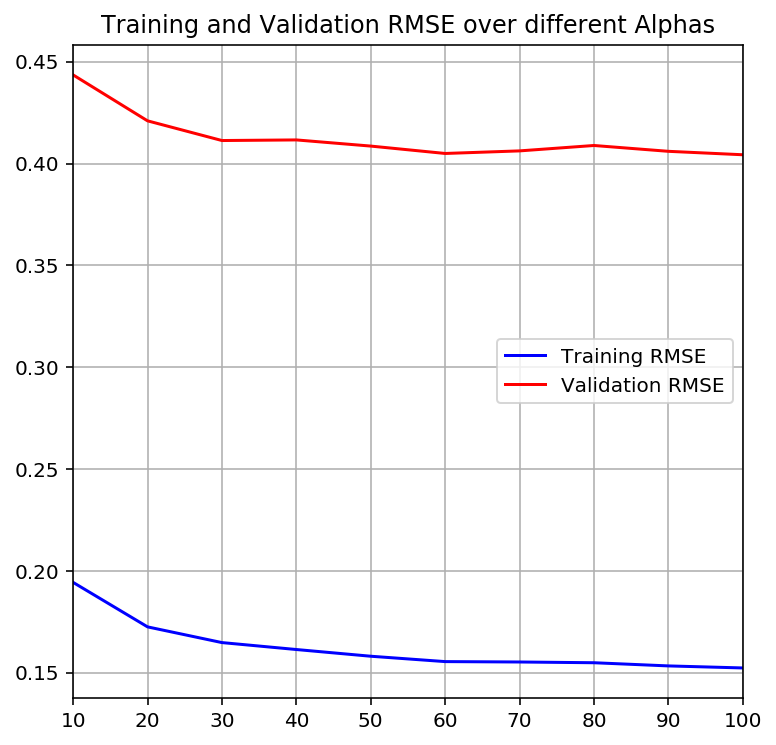

In [45]:
n_trees_list = np.arange(10,110, step=10)
modf.rforest_parameter_tuning(X_train, y_train, parameter_type='n_estimators', parameter_tuning_list=n_trees_list)

From the above diagram, we can see that the model starts to overfit at around 60 trees. As there is very little decreament of RMSE as we increase our trees from 60 to 100, to save computational power, we will be using 60 trees.

#### Max Depth Each Tree Should Be Grown To

This parameter will help regularize our model and prevent over-fitting, by limiting how deep we choose to grow our trees.

In [46]:
max_depth_list = list(np.arange(10,110, step=10))

For max_depth, the best value is 80.


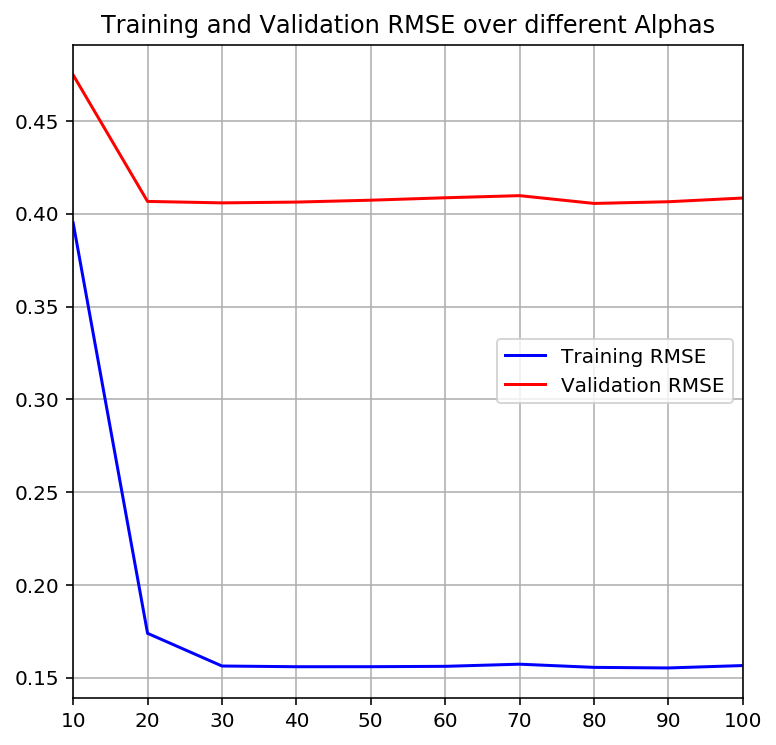

In [47]:
modf.rforest_parameter_tuning(X_train, y_train, parameter_type='max_depth', parameter_tuning_list=max_depth_list,
                         n_trees=60)

The model starts to overfit as depth increases from 20. From the diagram, a max depth value of 30 seems to balance the model fit between validation and training.

#### Minimum Samples Per Leaf

Tuning this parameter also helps to regularize our model.

For min_samples_leaf, the best value is 1.


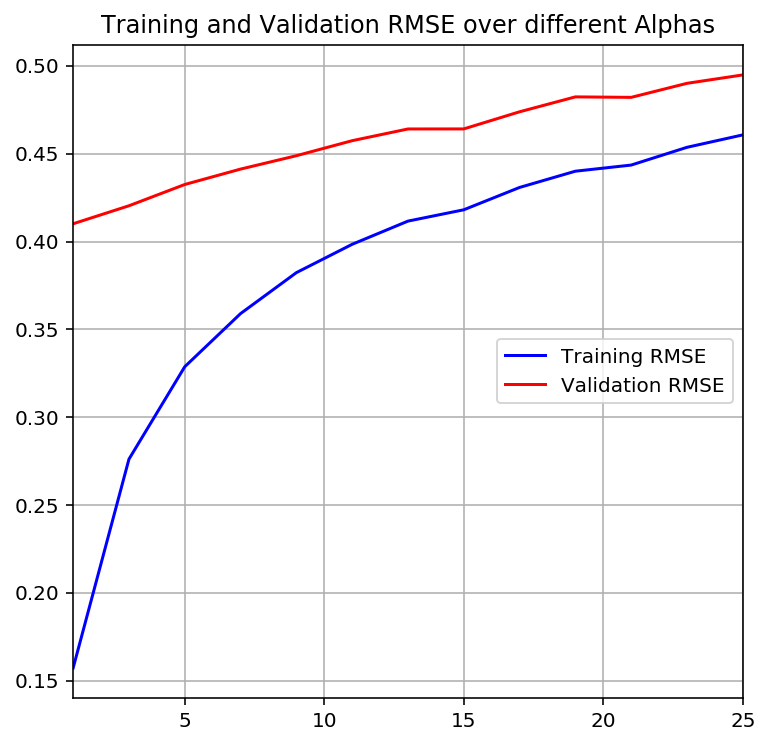

In [48]:
min_samples_leaf_list = np.arange(1,27,step=2)
modf.rforest_parameter_tuning(X_train, y_train, parameter_type='min_samples_leaf',
                              parameter_tuning_list=min_samples_leaf_list, n_trees=60, max_depth=30)

The diagram shows that the default value of 1 is optimal.

#### Max Features To Select For Each Tree

In [49]:
features = X_train.shape[1]
max_features_list = [int(np.ceil(np.log2(features))), int(np.ceil(np.sqrt(features))), int(features/3), features]
max_features_dict = dict(zip(['log2', 'sqrt', 'm/3', 'm'], max_features_list))

For max_features, the best value is 21.


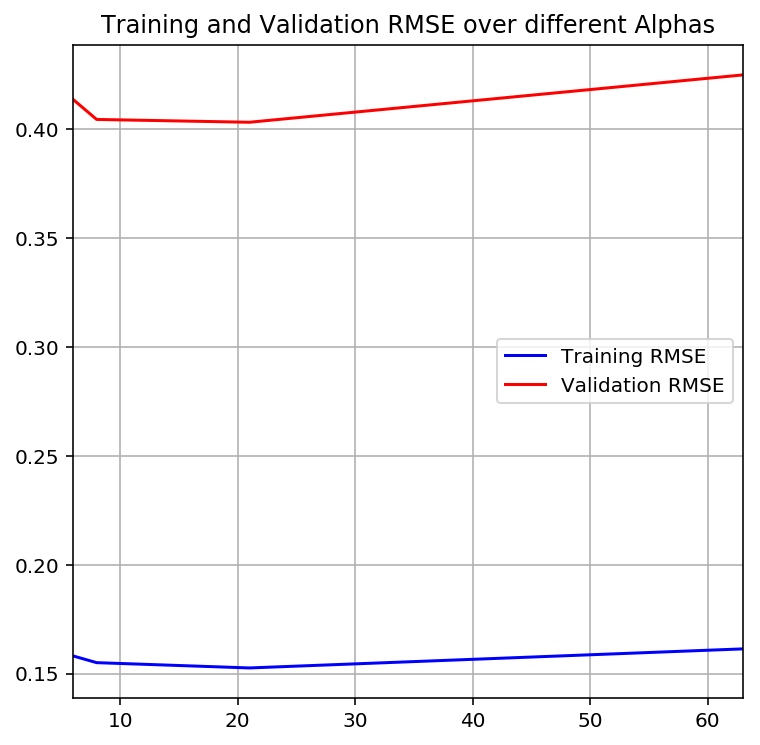

In [50]:
modf.rforest_parameter_tuning(X_train, y_train, parameter_type='max_features', parameter_tuning_list=max_features_list,
                              n_trees=60, max_depth=30, min_leaf=1)

### Fitting Our Tuned Random Forest Model

Optimal Parameters:
* n_estimators = 60
* max_depth = 30
* min_samples_leaf = 1
* max_features = 21 (m/3)

In [51]:
tuned_rforest = RandomForestRegressor(
    n_estimators=60,
    max_depth=30,
    min_samples_leaf=1,
    max_features=21,
    n_jobs=-1
)

In [52]:
rforest_rmse, rforest_score, rfores_adj_score = modf.kfold_cv_ensemble(X_train, y_train, tuned_rforest)

In [53]:
modf.model_results_summary(rforest_rmse, rforest_score, rfores_adj_score, model_type='Random Forest')

              Random Forest Results Summary
		 Mean RMSE 	 Mean R^2 	 Mean Adj R^2
Training 	 0.1540 	 0.9892 	 0.9892
Validation 	 0.4028 	 0.9260 	 0.9260


In [54]:
model_results = modf.append_results(model_results, 'RForest', rforest_rmse, rforest_score)

In [55]:
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521
1,Lasso,0.463449,0.902248
2,Ridge,0.462815,0.902499
3,RForest,0.402794,0.926005


In [56]:
# Comparing Baseline Performance 
baseline_rforest_score, baseline_rforest_rmse

(0.9112984749709128, 0.4409466021531908)

Comparing the results of the baseline vs the tuned Random Forest models, we can see that our tuning has improved the fit of the model.

## Baseline Gradient Boosting Regression Performance

In [57]:
baseline_gboost = GradientBoostingRegressor()
baseline_gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
# Baseline R-Squared
baseline_gboost_score = baseline_gboost.score(X_valid, y_valid)
baseline_gboost_score

0.9114059741927449

In [59]:
# Baseline RMSE
baseline_resid = y_valid - baseline_gboost.predict(X_valid)
baseline_gboost_rmse = np.sqrt(np.mean(baseline_resid**2))
baseline_gboost_rmse

0.4406793249728651

Simlilar to the Random Forest model, the baseline Gradient Booosting model outperformed the linear models. We will now try to tune the hyper parameters to improve model performance further.

### Tuning Gradient Boosting Hyper-parameters

#### Learning Rate

For learning_rate, the best value is 0.1.


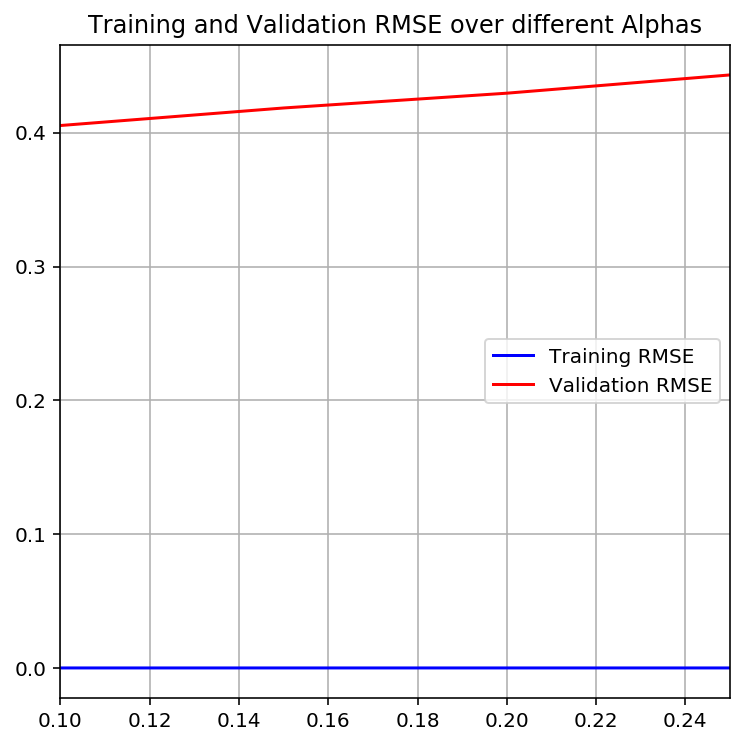

In [60]:
learning_rate_list = np.linspace(0.1,0.25, 4)
modf.gboost_parameter_tuning(X_train, y_train, parameter_type='learning_rate', parameter_tuning_list=learning_rate_list)

From the diagram above, we observe that the model starts to overfit as we increase our learning rate.

As a learning rate of 0.1 provided the lowest validation RMSE, we will proceed with that.

#### Number Of Trees

For n_estimators, the best value is 150.


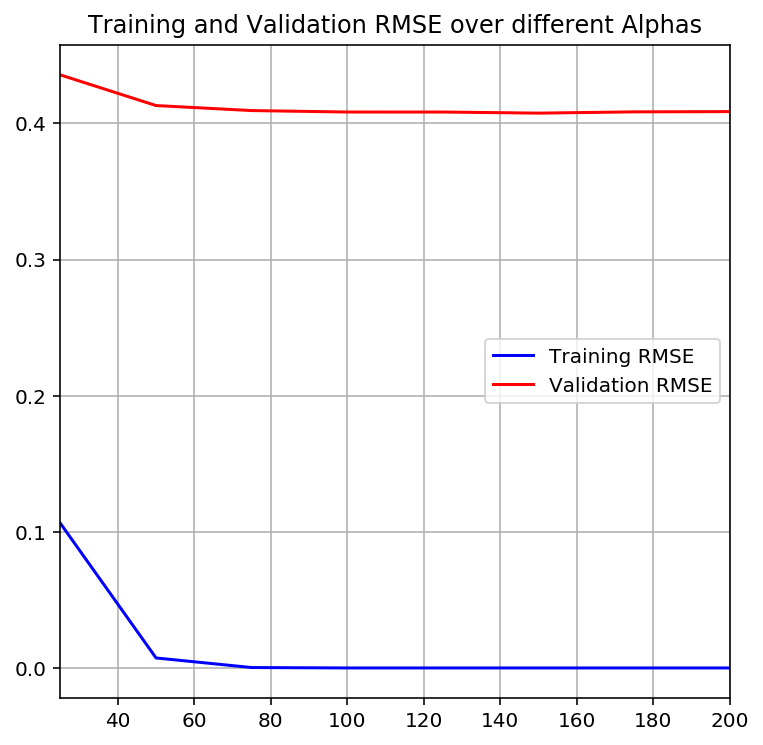

In [61]:
n_trees_list = np.linspace(25, 200, 8)
n_trees_list = [int(ele) for ele in n_trees_list]
modf.gboost_parameter_tuning(X_train, y_train, parameter_type='n_estimators', parameter_tuning_list=n_trees_list,
                             learning_rate=0.1)

From the diagram, we can see that there is minimal gain in model fit after around 50 trees for the validation data.

#### Max Depth Each Tree Should Be Grown To

For max_depth, the best value is 10.


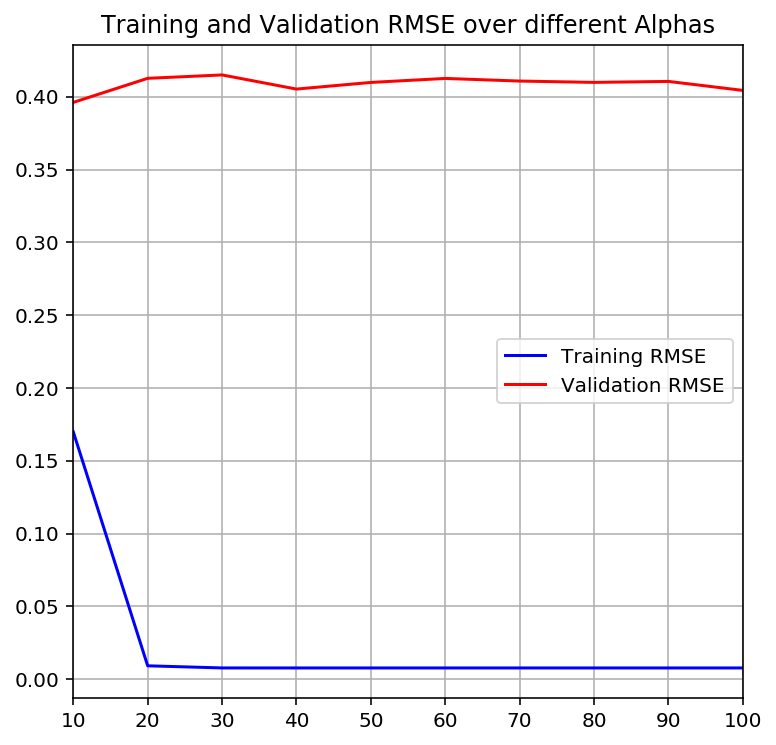

In [62]:
max_depth_list = list(np.arange(10,110, step=10))
modf.gboost_parameter_tuning(X_train, y_train, parameter_type='max_depth', parameter_tuning_list=max_depth_list,
                             learning_rate=0.1, n_trees=50,)

We will set our max depth as 10 moving forward as anything more causes the model to overfit.

#### Max Features

In [63]:
features = X_train.shape[1]
max_features_list = [int(np.ceil(np.log2(features))), int(np.ceil(np.sqrt(features))), int(features/3), features]
max_features_dict = dict(zip(['log2', 'sqrt', 'm/3', 'm'], max_features_list))

In [64]:
max_features_dict

{'log2': 6, 'sqrt': 8, 'm/3': 21, 'm': 63}

For max_features, the best value is 6.


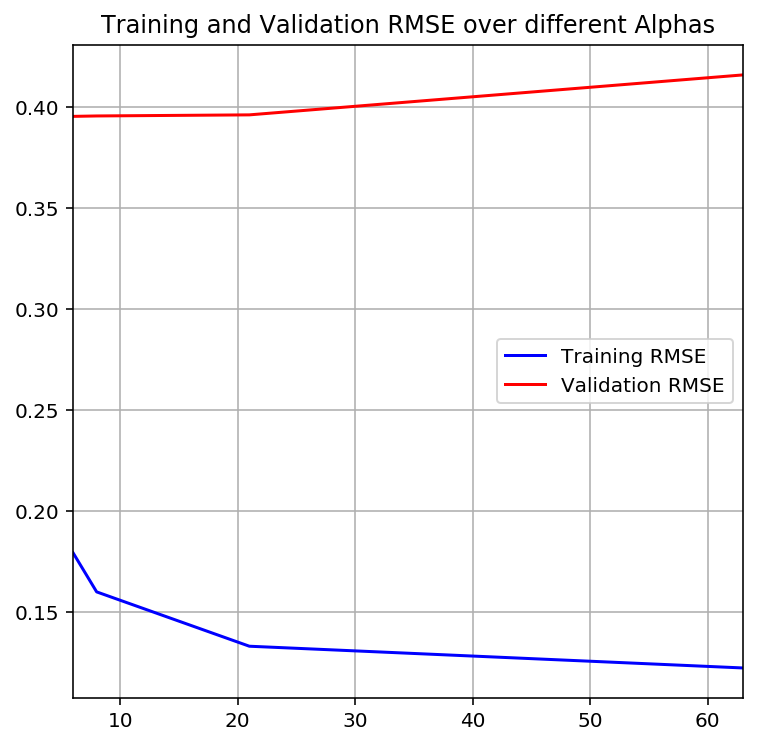

In [65]:
modf.gboost_parameter_tuning(X_train, y_train, parameter_type='max_features', parameter_tuning_list=max_features_list,
                             learning_rate=0.1, n_trees=50, max_depth=10)

We select max features to be 21 as it looks like a good balance between training and validation model fit.

#### Subsample
Subsample sets the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

For subsample, the best value is 0.75.


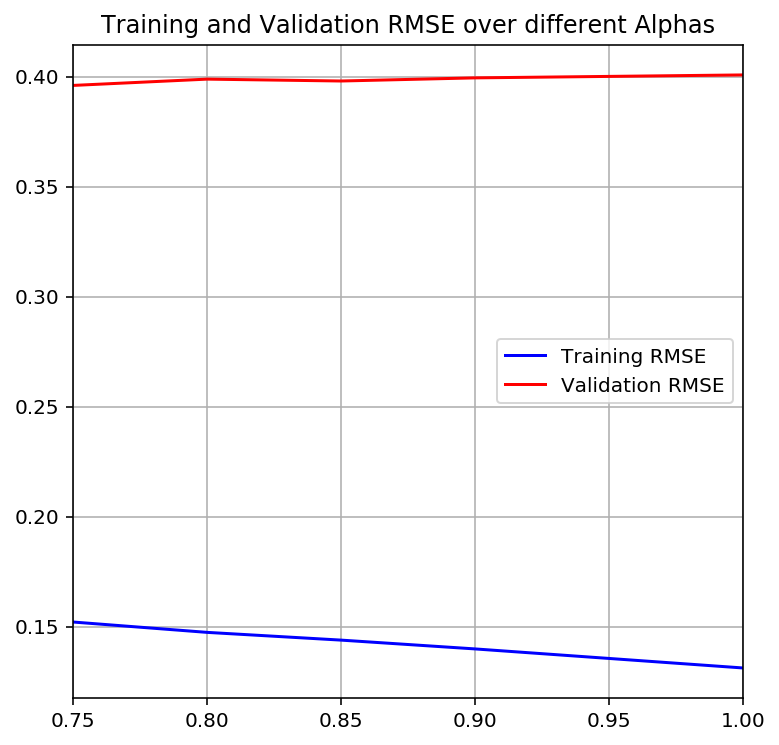

In [66]:
subsample_list = [0.75, 0.80, 0.85, 0.9, 1.0]
modf.gboost_parameter_tuning(X_train, y_train, parameter_type='subsample', parameter_tuning_list=subsample_list,
                             learning_rate=0.1, n_trees=50, max_depth=10, max_features=21)

### Fitting Our Tuned Gradient Boosting Regressor Model

Optimal Parameters:
* learning_rate = 0.1
* n_estimators = 50
* max_depth = 10
* max_features = 21 (m/3)
* subsample = 0.75

In [67]:
tuned_gboost = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=50,
    max_depth=10,
    max_features=21,
    subsample=0.75
)

In [71]:
gboost_rmse, gboost_score, gboost_adj_score = modf.kfold_cv_ensemble(X_train, y_train, tuned_gboost)

In [72]:
modf.model_results_summary(gboost_rmse, gboost_score, gboost_adj_score, 'Gradient Boosting')

              Gradient Boosting Results Summary
		 Mean RMSE 	 Mean R^2 	 Mean Adj R^2
Training 	 0.1510 	 0.9896 	 0.9896
Validation 	 0.3994 	 0.9274 	 0.9273


In [73]:
model_results = modf.append_results(model_results, 'GBoost', gboost_rmse, gboost_score)

In [74]:
model_results

,Model,RMSE,R-Squared
0,Linear,0.462683,0.902521
1,Lasso,0.463449,0.902248
2,Ridge,0.462815,0.902499
3,RForest,0.402794,0.926005
4,GBoost,0.399422,0.927367


From the results above, the ensemble methods outclassed the linear models with significantly better RMSE and Coefficient of Determination scores. 

Among the ensemble methods, the Gradient Boosting model performed better, albeit only slightly better than the Random Forest. 

Next, we will test our models again on the holdout testing dataset (20% of data) and evaluate the results.

### Fitting Models on Testing Dataset

#### Linear Regression

In [78]:
testing_model_results = pd.DataFrame(columns=model_results.columns)

In [80]:
linear_test = LinearRegression(fit_intercept=True, n_jobs=-1)
linear_test.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [104]:
linear_test_rmse = modf.get_rmse(linear_test, X_valid, y_valid)
linear_test_rmse

0.4640556415003492

In [103]:
linear_test_score = linear_test.score(X_valid, y_valid)
linear_test_score

0.9017575466333676

#### Lasso Regression

In [95]:
lasso_test = Lasso(alpha=0.001, fit_intercept=True)
lasso_test.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
lasso_test_rmse = modf.get_rmse(lasso_test, X_valid, y_valid)
lasso_test_rmse

0.47813722297347544

In [106]:
lasso_test_score = lasso_test.score(X_valid, y_valid)
lasso_test_score

0.8957048301844818

#### Ridge Regression

In [98]:
ridge_test = Ridge(alpha=11, fit_intercept=True)
ridge_test.fit(X_train, y_train)

Ridge(alpha=11, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [107]:
ridge_test_rmse = modf.get_rmse(ridge_test, X_valid, y_valid)
ridge_test_rmse

0.4717722946554143

In [108]:
ridge_test_score = ridge_test.score(X_valid, y_valid)
ridge_test_score

0.8984630879020992

#### Random Forest

In [111]:
tuned_rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=21, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [112]:
rforest_test_rmse = modf.get_rmse(tuned_rforest, X_valid, y_valid)
rforest_test_rmse

0.408753501951886

In [113]:
rforest_test_score = tuned_rforest.score(X_valid, y_valid)
rforest_test_score

0.9237776983505683

#### Gradient Boosting

In [114]:
tuned_gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=21, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
gboost_test_rmse = modf.get_rmse(tuned_gboost, X_valid, y_valid)
gboost_test_rmse

0.39747702797529805

In [116]:
gboost_test_score = tuned_gboost.score(X_valid, y_valid)
gboost_test_score

0.9279252485167025

### Evaluating Model Performaces on Testing Data

In [132]:
print('Testing Data Model Evaluation')
print('=' * 50)
print('\t', 'Mean RMSE', '\t', 'Mean R^2', '\t')
print('Linear', '\t', '{:.4f}'.format(linear_test_rmse), '\t', '{:.4f}'.format(linear_test_score))
print('Lasso', '\t', '{:.4f}'.format(lasso_test_rmse), '\t', '{:.4f}'.format(lasso_test_score))
print('Ridge', '\t', '{:.4f}'.format(ridge_test_rmse), '\t', '{:.4f}'.format(ridge_test_score))
print('Forest', '\t', '{:.4f}'.format(rforest_test_rmse), '\t', '{:.4f}'.format(rforest_test_score))
print('GBoost', '\t', '{:.4f}'.format(gboost_test_rmse), '\t', '{:.4f}'.format(gboost_test_score))

Testing Data Model Evaluation
	 Mean RMSE 	 Mean R^2 	
Linear 	 0.4641 	 0.9018
Lasso 	 0.4781 	 0.8957
Ridge 	 0.4718 	 0.8985
Forest 	 0.4088 	 0.9238
GBoost 	 0.3975 	 0.9279


Similar to our training results, the Gradient Boosting algorithm performed the best on the out of sample data.

Although the ensemble methods have performed better, the linear models performances are quite competitive as well. Therefore, if there is a need to extrapolate data, the linear models would be more appropriate. They would also be useful for inference analysis on the marginal effects of each feature on the target variable. 

However, as our main aim is to achieve the most accurate predictions, we will be using the Gradient Boosting model as our chosen model.

In [ ]:
with open('selected_model.pickle', 'wb') as f:
    pickle.dump(tuned_gboost, f)